# Implementación de PCA
Las bases matemáticas 

In [2]:
#bases matemáticas del PCA
#10/03/21
#Edmundo Vazquez
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#recuperemos este archivo
Samples_2 = np.loadtxt('dataset2.csv', dtype=float, delimiter = ',' )
#print(Samples_2)
#en este caso las columnas se tratan de las variables y las filas de los datos 
#por lo que esperamos recibir una matriz de covarianza 4x4
M_1 = Samples_2.transpose()
print(M_1)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
  3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
  3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
  2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
  2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
  2.6 3.  2.

In [10]:
#recuerda, al usar este metodo si las variables están en las columnas
#hay que transponer la matriz
covariance = np.cov(M_1)
print(covariance)
covariance.shape

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


(4, 4)

In [11]:
#ahora que tenemos la matriz de covarianza, basta calcular sus 
#eigenvalores e eigenvectores
eigvl, eigv = np.linalg.eig(covariance) #calculamos eigvalores y eigvect
print(eigvl)
print(eigv)

[4.22824171 0.24267075 0.0782095  0.02383509]
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


### Usando la libreria de scikit learn
https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Samples_2)

PCA(n_components=2)

In [15]:
print(pca.components_) #concuerda con los eigvect calculados

print(pca.explained_variance_) #tambien concuerda con los eigval

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
[4.22824171 0.24267075]


In [19]:
#graficamos estas componentes principales
#para esto transformamos nuestro dataset
X_pca = pca.transform(Samples_2)
print("original shape:   ", Samples_2.shape)
print("transformed shape:", X_pca.shape)


original shape:    (150, 4)
transformed shape: (150, 2)


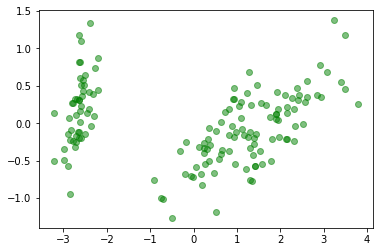

In [21]:
#Finalmente graficamos
plt.plot(X_pca[::1,0],X_pca[::1,1], 'o', alpha=0.5, color='g')
plt.savefig('PCA.png')